In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# 📌 ตั้งค่า ChromeDriver
# หากใช้ Selenium เวอร์ชั่น 4.6 ขึ้นไป ไม่จำเป็นต้องระบุ path ของ ChromeDriver แล้ว 
# ระบบจะจัดการให้โดยอัตโนมัติ (แต่ถ้าจะใช้แบบเดิมให้ uncomment 2 บรรทัดล่างครับ)
# chrome_driver_path = r"C:\path\to\your\chromedriver.exe"
# service = Service(chrome_driver_path)
# driver = webdriver.Chrome(service=service)

driver = webdriver.Chrome()

print("กำลังเปิดเว็บไซต์ JobsDB...")
driver.get("https://th.jobsdb.com/jobs?keywords=python")
time.sleep(3) # รอให้เว็บโหลด

try:
    # รอจนกว่ากล่องประกาศงาน (ใช้ Tag <article>) จะโหลดขึ้นมา
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "article"))
    )
    print("โหลดหน้าเว็บสำเร็จ! กำลังเริ่มดึงข้อมูล...")
except:
    print("❌ โหลดเว็บไม่สำเร็จ หรือไม่พบข้อมูลงาน")
    driver.quit()
    exit()

# 🔍 ดึงข้อมูลงาน
job_list = []
# JobsDB มักจะครอบข้อมูลงาน 1 งาน ไว้ใน Tag <article> เสมอ
jobs = driver.find_elements(By.TAG_NAME, "article")

for job in jobs:
    try:
        # 1. ดึงชื่องานและลิงก์ (เจาะจงไปที่ data-automation="jobTitle")
        title_elem = job.find_element(By.CSS_SELECTOR, '[data-automation="jobTitle"]')
        title = title_elem.text
        link = title_elem.get_attribute("href")
        
        # 2. ดึงชื่อบริษัท
        try:
            company = job.find_element(By.CSS_SELECTOR, '[data-automation="jobCompany"]').text
        except:
            company = "ไม่ระบุบริษัท"
            
        # 3. ดึงสถานที่ทำงาน
        try:
            location = job.find_element(By.CSS_SELECTOR, '[data-automation="jobLocation"]').text
        except:
            location = "ไม่ระบุสถานที่"
            
        # เก็บข้อมูลเข้า List
        job_list.append({
            "ชื่องาน": title, 
            "บริษัท": company, 
            "สถานที่": location, 
            "ลิงก์": link
        })
    except Exception as e:
        # ถ้าหาชื่องานไม่เจอ (อาจจะเป็นกล่องโฆษณา) ให้ข้ามไป
        continue

# 🔽 บันทึกข้อมูลลง CSV
df = pd.DataFrame(job_list)
df.to_csv("jobsdb_data.csv", index=False, encoding="utf-8-sig")

# ✅ ปิดเบราว์เซอร์
driver.quit()

# 🎉 แสดงตัวอย่างข้อมูลที่ดึงมา
print("\nดึงข้อมูลเสร็จสิ้น! ตัวอย่างข้อมูล:")
df.head(10)

กำลังเปิดเว็บไซต์ JobsDB...
โหลดหน้าเว็บสำเร็จ! กำลังเริ่มดึงข้อมูล...

ดึงข้อมูลเสร็จสิ้น! ตัวอย่างข้อมูล:


,ชื่องาน,บริษัท,สถานที่,ลิงก์
0,Python Developer (Contractor),THE PRODIGY (THAILAND) PUBLIC COMPANY LIMITED,Phaya Thai,https://th.jobsdb.com/job/90361051?type=standa...
1,Python Developer,"APRIL Assistance (Thailand) Co., Ltd.",Bangkok,https://th.jobsdb.com/job/90285632?type=standa...
2,Programmer,"Skillpower Services (Thailand) Co., Ltd.",Lamphun,https://th.jobsdb.com/job/90401956?type=standa...
3,Process Automation Engineer (Python & RPA),Triple T Broadband Public Company Limited,Pak Kret,https://th.jobsdb.com/job/89799822?type=standa...
4,AI Engineer (Computer Vision),HRnet One Executive Recruitment (Thailand) Ltd.,Bangkok,https://th.jobsdb.com/job/90408093?type=standa...
5,Back-end Developer - Python Focused,HRnet One Executive Recruitment (Thailand) Ltd.,Bangkok,https://th.jobsdb.com/job/89903774?type=standa...
6,Data Engineer (Python) - Contract,PERSOL Thailand,Bangkok,https://th.jobsdb.com/job/90274489?type=standa...
7,"Software Designer (Embedded - C, C++)",ALSTOM (Thailand) Ltd.,Bangkok,https://th.jobsdb.com/job/90393364?type=standa...
8,Data Engineer,SUNSUSOLUTION COMPANY LIMITED,Bangkok,https://th.jobsdb.com/job/90366546?type=standa...
9,Full Stack Developer,"Charoen Pokphand Group Co., Ltd.",Bangkok,https://th.jobsdb.com/job/90031441?type=standa...


In [4]:
%pip install selenium pandas

  Using cached selenium-4.40.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached trio-0.33.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached trio_typing-0.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached types_certifi-2021.10.8.3-py3-none-any.whl.metadata (1.4 kB)
  Using cached types_urllib3-1.26.25.14-py3-none-any.whl.metadata (1.7 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached async_generator-1.10-py3-none-any.whl.metadata (4.9 kB)
  Using cached wsproto-1.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached selenium-4.40.0-py3-none-any.w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httpcore 1.0.2 requires h11<0.15,>=0.13, but you have h11 0.16.0 which is incompatible.


c:\Users\realr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


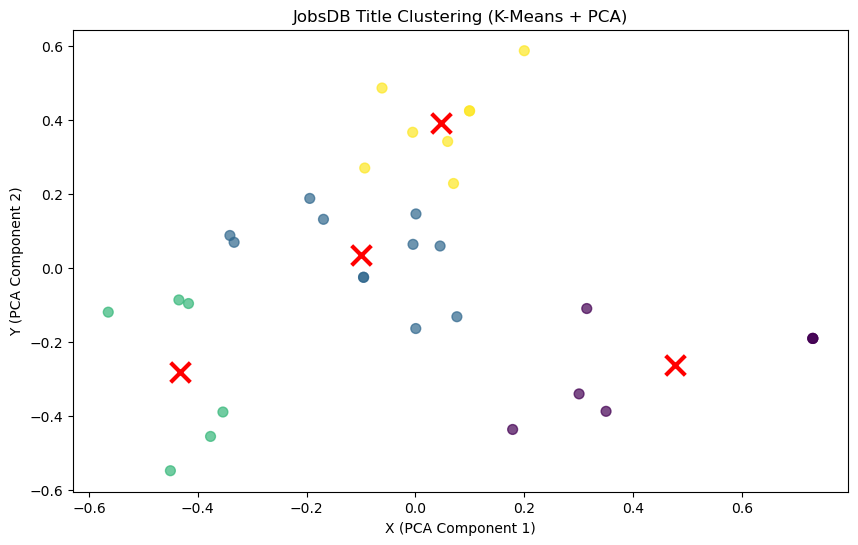

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


try:
    df = pd.read_csv("jobsdb_data.csv")
    documents = df['ชื่องาน'].dropna().tolist()
except FileNotFoundError:
    exit()

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(documents)

# 3. 🌟 บีบอัดมิติข้อมูล (PCA) จากหลายร้อยแกนให้เหลือแค่ 2 แกน (X, Y) เพื่อให้วาดรูปได้
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

# 4. สร้างโมเดล KMeans จัดกลุ่มข้อมูล 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_2d)

# ดึงตำแหน่งกึ่งกลาง (Centroids) และป้ายกำกับกลุ่ม (Labels)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# 5. พล็อตข้อมูลลงกราฟ (ใช้รูปแบบเดียวกับที่คุณแคปมาเลยครับ)
plt.figure(figsize=(10, 6)) 

# พล็อตจุดข้อมูลชื่องาน (ระบายสีตามกลุ่มด้วย c=labels)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)

# พล็อตจุดกึ่งกลาง (Centroid) เป็นรูปกากบาทสีแดง
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', linewidths=3)

# ใส่ชื่อกราฟและแกน
plt.title("JobsDB Title Clustering (K-Means + PCA)")
plt.xlabel("X (PCA Component 1)")
plt.ylabel("Y (PCA Component 2)")

# แสดงกราฟ
plt.show()

c:\Users\realr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


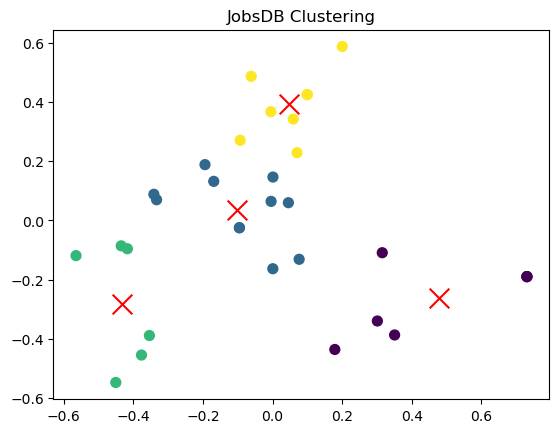

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv("jobsdb_data.csv")
job_titles = df['ชื่องาน'].dropna().tolist()

# 2. แปลงข้อความเป็นตัวเลข
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(job_titles)

# 3. ใช้ PCA บีบอัดมิติให้เหลือแค่ 2 มิติ (X, Y) 
pca = PCA(n_components=2)
X = pca.fit_transform(X_text.toarray())

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=4)

# สร้างโมเดล KMeans ด้วยข้อมูล
kmeans.fit(X)

# ดึงข้อมูล centroids และ labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# พล็อตข้อมูลและ centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')

# (เพิ่มเติม) ใส่ชื่อกราฟให้รู้ว่าเป็นข้อมูล JobsDB
plt.title("JobsDB Clustering") 
plt.show()

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. โหลดข้อมูลจากไฟล์ CSV ที่เรา Scrape มา
try:
    df = pd.read_csv("jobsdb_data.csv")
    documents = df['ชื่องาน'].dropna().tolist()
    print(f"โหลดข้อมูลสำเร็จ! จำนวนงานทั้งหมด: {len(documents)} รายการ\n")
except FileNotFoundError:
    exit()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 5 
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10, random_state=42)
model.fit(X)

print("Top terms per cluster (คำศัพท์หลักในแต่ละกลุ่ม):")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]: 
        print(' %s' % terms[ind])
    print()

print("-" * 30)
print("🔍 ทดสอบการทำนายกลุ่มของงานใหม่ (Prediction)")

new_jobs = [
    "Senior Python Web Developer",
    "Data Scientist and Machine Learning",
    "IT Support Helpdesk"
]

Y = vectorizer.transform(new_jobs)
predictions = model.predict(Y)

for job, pred in zip(new_jobs, predictions):
    print(f"'{job}' => ถูกจัดให้อยู่ใน Cluster {pred}")

โหลดข้อมูลสำเร็จ! จำนวนงานทั้งหมด: 32 รายการ

Top terms per cluster (คำศัพท์หลักในแต่ละกลุ่ม):
Cluster 0:
 python
 developer
 contractor
 end
 analyst
 required
 focused
 data
 company
 fintech

Cluster 1:
 ai
 engineer
 developer
 computer
 vision
 application
 level
 machine
 fintech
 learning

Cluster 2:
 software
 engineer
 chonburi
 inventory
 embedded
 designer
 aws
 cloud
 python
 automation

Cluster 3:
 stack
 developer
 software
 โปรแกรมเมอร
 programmer
 backend
 contract
 engineer
 bang
 kapi

Cluster 4:
 data
 engineer
 python
 contract
 gem
 airflow
 sql
 mid
 platform
 senior

------------------------------
🔍 ทดสอบการทำนายกลุ่มของงานใหม่ (Prediction)
'Senior Python Web Developer' => ถูกจัดให้อยู่ใน Cluster 0
'Data Scientist and Machine Learning' => ถูกจัดให้อยู่ใน Cluster 4
'IT Support Helpdesk' => ถูกจัดให้อยู่ใน Cluster 3
